**Housing predictions for the Iowa data.**


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence,partial_dependence
from sklearn.decomposition import PCA 
from sklearn.preprocessing import Imputer
from matplotlib import pyplot as plt
import numpy as np
import math

In [10]:
test = pd.read_csv("./input/test.csv")
train = pd.read_csv("./input/train.csv")

In [11]:
X=train.drop(['SalePrice'],axis=1)
y=train.SalePrice
#print (X.SalePrice)
val_X = test[list(test)]

In [12]:
one_hot_pred=pd.get_dummies(X)

one_hot_encoded_test_predictors = pd.get_dummies(val_X)
final_train, final_test = one_hot_pred.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)

In [13]:

my_imputer = Imputer()
imputed_X_train = my_imputer.fit_transform(final_train)
imputed_X_test = my_imputer.transform(final_test)


In [14]:
print(imputed_X_train.shape)
print(imputed_X_train.shape)

(1460, 289)
(1460, 289)


**Gradient Boosting Regressor params**

In [17]:
gb_plus_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01)
gb_plus_model.fit(imputed_X_train,y)
gb_plus_pred_prices = gb_plus_model.predict(imputed_X_test)
#print(gb_plus_pred_prices)

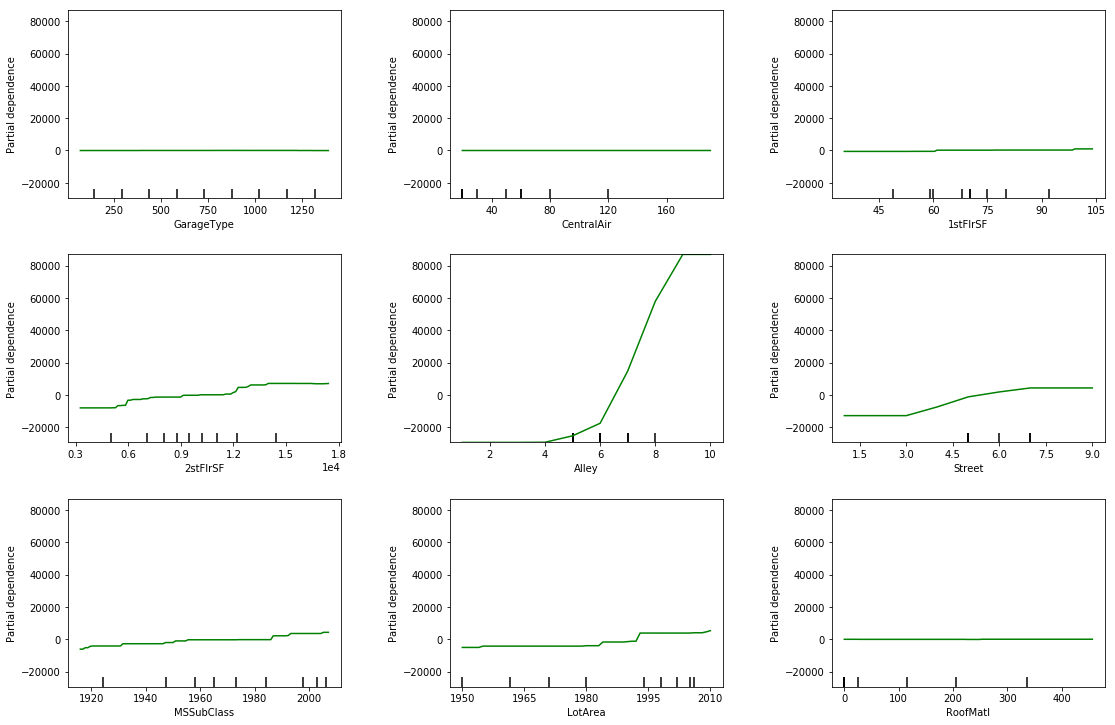

In [22]:
fig ,axs = plot_partial_dependence(gb_plus_model,
                                      features=[0,1,2,3,4,5,6,7,8],
                                      X=imputed_X_train,
                                      feature_names=['GarageType',
                                                     'CentralAir',
                                                     '1stFlrSF',
                                                     '2stFlrSF',
                                                     'Alley',
                                                     'Street',
                                                     'MSSubClass',
                                                     'LotArea',
                                                     'RoofMatl'],
                                      grid_resolution=100)

plt.subplots_adjust(top=2.5,right=2.5)

**Principal component analysis**

(0, 8)

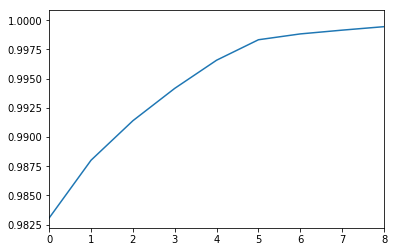

In [23]:
pca = PCA().fit(imputed_X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,8,1)


In [24]:
sklearn_pca = PCA(n_components=5)
print(sklearn_pca)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [25]:
X_sklearn = sklearn_pca.fit_transform(imputed_X_train)
print(X.shape,'Dimensionality reduction to',X_sklearn.shape)


(1460, 80) Dimensionality reduction to (1460, 5)


In [26]:
test_X_sklearn = sklearn_pca.transform(imputed_X_test)
print(val_X.shape,'Dimensionality reduction to',test_X_sklearn.shape)

(1459, 80) Dimensionality reduction to (1459, 5)
